In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [3]:
n = 1e4
demensions = [1, 100, 200, 300, 400, 500]
neighbors = [3, 7, 15]
nnlabel = ['3-NN', '7-NN', '15-NN']

In [4]:
cross_val_dim_scores = []

for d in demensions:
    
    a = 2 / np.sqrt(d)
    
    x1 = np.random.normal(a, 1, size=(int(n / 2), d))
    x2 = np.random.normal(-a, 1, size=(int(n / 2), d))
    x = np.concatenate((x1, x2))
    y1 = np.full((int(n / 2), 1), 0)
    y2 = np.full((int(n / 2), 1), 1)
    y = np.concatenate((y1, y2))
    
    cross_val_scores = []
    
    for i in neighbors:
        
        print(f"{d} dim: {i}-nn")
        
        knn = KNeighborsClassifier(n_neighbors=i)
        scores_all = []
        for i in range(10):
            scores = cross_val_score(knn, x, y, cv=10)
            scores_all.append(scores)
        cross_val_scores.append(np.mean(scores_all))
        
    cross_val_dim_scores.append(cross_val_scores)

1 dim: 3-nn
1 dim: 7-nn
1 dim: 15-nn
100 dim: 3-nn
100 dim: 7-nn
100 dim: 15-nn
200 dim: 3-nn
200 dim: 7-nn
200 dim: 15-nn
300 dim: 3-nn
300 dim: 7-nn
300 dim: 15-nn
400 dim: 3-nn
400 dim: 7-nn
400 dim: 15-nn
500 dim: 3-nn
500 dim: 7-nn
500 dim: 15-nn


In [14]:
mme_scores = 1 - np.array(cross_val_dim_scores)

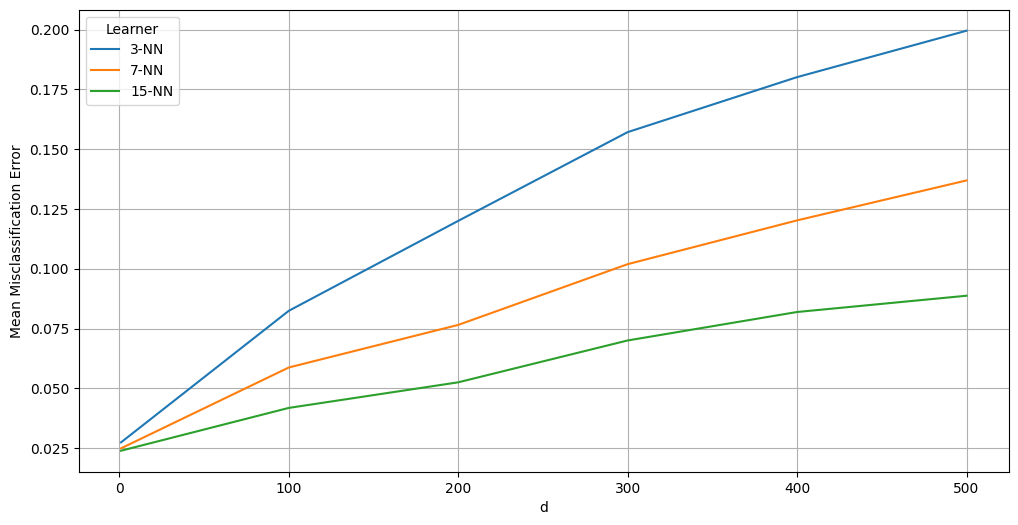

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(demensions, mme_scores, label=nnlabel)
ax.set_ylabel('Mean Misclassification Error')
ax.set_xlabel('d')
ax.legend(title='Learner')
ax.grid(True)
fig.savefig("figure.png")
plt.show()